# Data Analysis Example

In [343]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.weightstats import zconfint
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

sns.set(style="ticks", color_codes=True)

## 1. Load data

In [72]:
df = pd.read_csv(r'F:\Work\My\Python\examples\titanic_example\titanic3.csv', decimal=",")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 2. EDA

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [74]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [75]:
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [76]:
df.isnull().sum()/len(df)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

# 3. Visualization

### Numeric features visualization

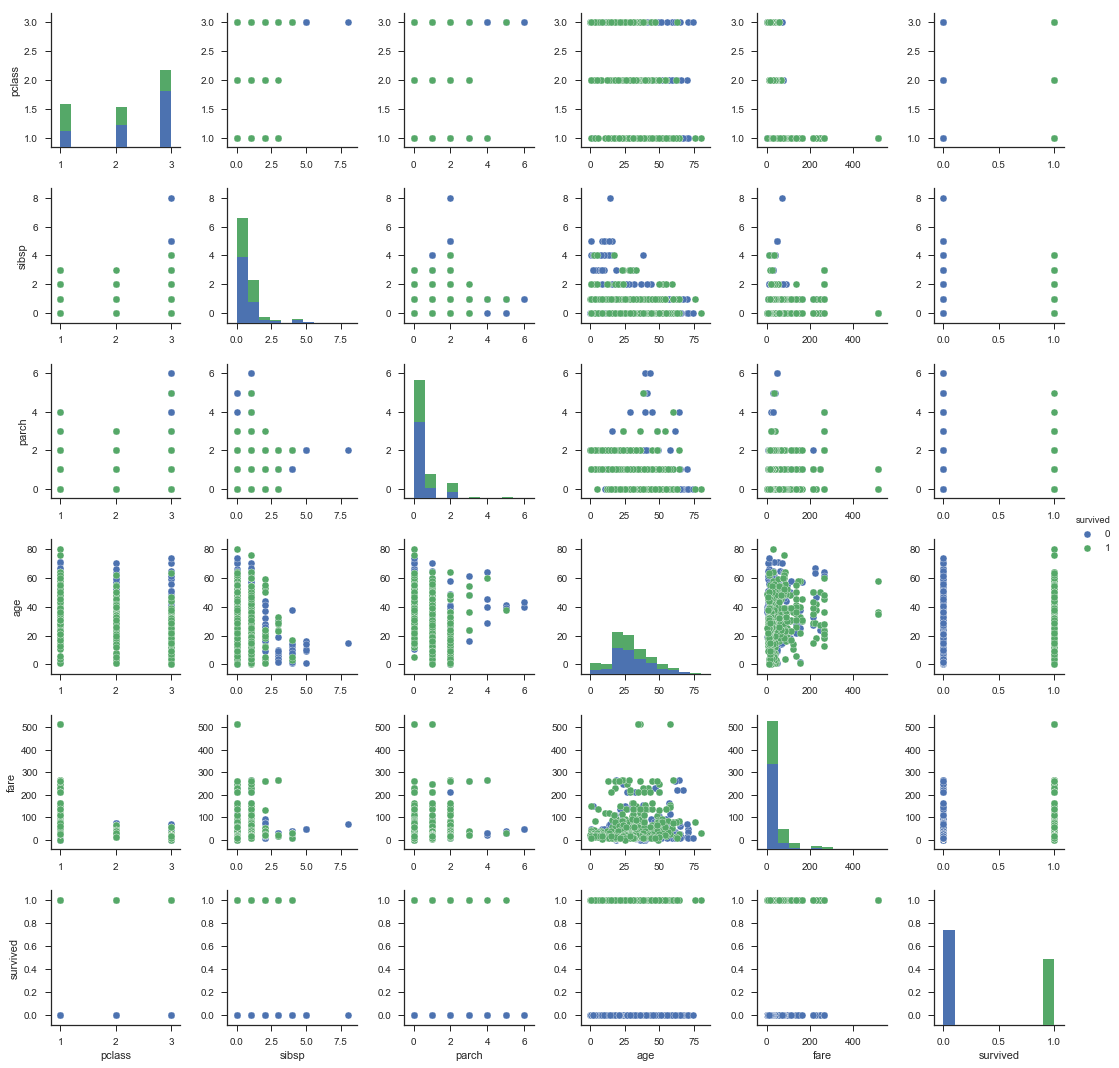

In [105]:
numeric_df = df[['pclass', 'sibsp', 'parch', 'age', 'fare', 'survived']].dropna()

g = sns.pairplot(numeric_df, hue='survived')

plt.show()

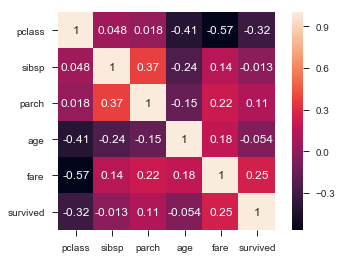

In [235]:
corr_coeffs = numeric_df.corr()
sns.heatmap(corr_coeffs, square=True, annot=True)
plt.show()

### Categorical features visualization

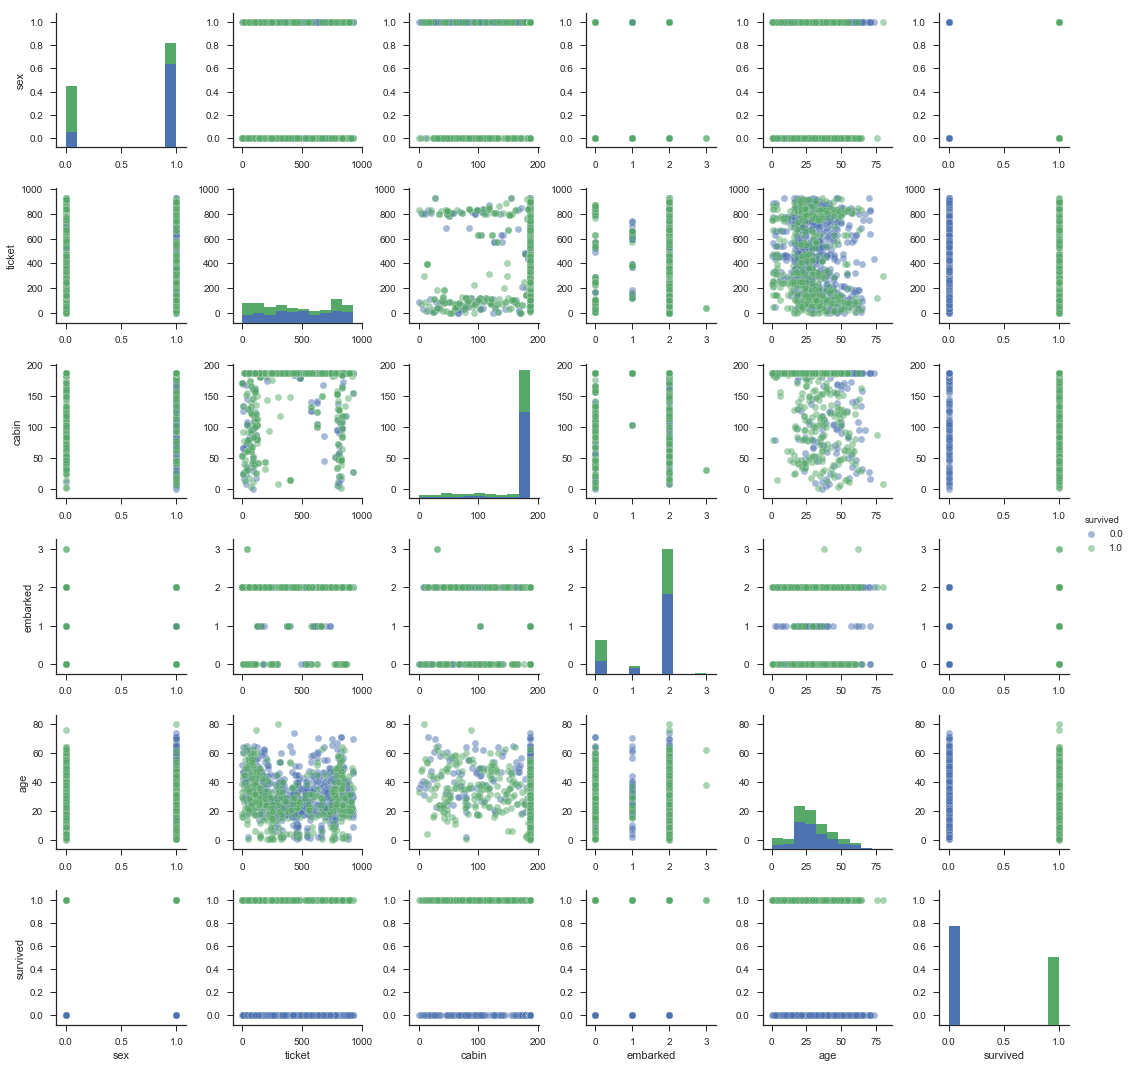

In [244]:
cat_df = df[['sex', 'ticket', 'cabin', 'embarked']].fillna('__none__')

for column in cat_df.columns:
    enc = LabelEncoder()
    cat_df[column] = enc.fit_transform(cat_df[column])
     
cat_df['age'] = df['age']
cat_df['survived'] = df['survived']
cat_df = cat_df.dropna().astype(float)

g = sns.pairplot(cat_df, hue='survived', plot_kws={'alpha': 0.5})

plt.show()

In [250]:
cat_corrs = cat_df.drop(['age', 'survived'], axis=1).apply(lambda col: matthews_corrcoef(col.values, cat_df['survived']), axis=0)
print(cat_corrs)

sex        -0.538000
ticket     -0.001377
cabin       0.002046
embarked   -0.115301
dtype: float64


## 4. Hypotheses testing

### 4.1 Women (Sex=female) were more likely to have survived

In [253]:
XW = df[df['sex'] == 'female']['survived'].values
XM = df[df['sex'] == 'male']['survived'].values

Proportions:

In [257]:
print('Mean women survived:', XW.mean())
print('Mean men survived:', XM.mean())

Mean women survived: 0.727467811159
Mean men survived: 0.190984578885


Confidence interval for proportions:

In [261]:
conf_interval_women = proportion_confint(sum(XW), len(XW), method = 'wilson')
conf_interval_men = proportion_confint(sum(XM), len(XM), method = 'wilson')

print('95%% confidence interval, women: [{0}, {1}]'.format(conf_interval_women[0], conf_interval_women[1]))
print('95%% confidence interval, men: [{0}, {1}]'.format(conf_interval_men[0], conf_interval_men[1]))

95%% confidence interval, women: [0.6853037463623987, 0.7659122883658301]
95%% confidence interval, men: [0.16587495031856123. 0.21889773106912006]


Hypothesis H0: E(XW) = E(XM)

z-criteria for independent samples proportions:

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [271]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [282]:
def proportions_diff_z_test(sample1, sample2, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
    
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [334]:
res = proportions_diff_confint_ind(XW, XM)

print('95%% confidence interval for a difference between proportions: [{0}, {1}]'.format(res[0], res[1]))

95%% confidence interval for a difference between proportions: [0.4881260130190316, 0.5848404515286955]


In [285]:
pval = proportions_diff_z_test(XW, XM)

print('p-value:', pval)

p-value: 0.0


### 4.2 Passengers with bigger fare were most likely to be survived

In [301]:
XS = df[df['survived']==1]['fare'].dropna()
XD = df[df['survived']==0]['fare'].dropna()

In [302]:
print('Survived mean fare:', XS.mean())
print('Died mean fare:', XD.mean())

Survived mean fare: 49.36118360000002
Died mean fare: 23.35383056930686


Confidence interval for means:

In [333]:
conf_interval_survived = zconfint(XS)
conf_interval_died = zconfint(XD)

print('95%% confidence interval, survived: [{0}, {1}]'.format(conf_interval_survived[0], conf_interval_survived[1]))
print('95%% confidence interval, died: [{0}, {1}]'.format(conf_interval_died[0], conf_interval_died[1]))

95%% confidence interval, survived: [43.34396195303895, 55.37840524696106]
95%% confidence interval, died: [20.99948208934228. 25.708179049271585]


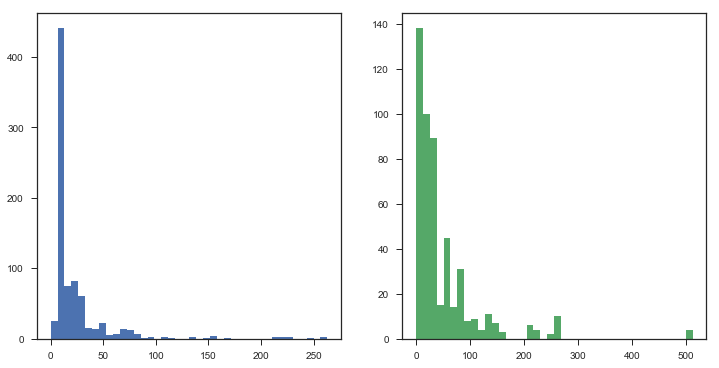

In [326]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(XD, bins=40, color='b')
axes[1].hist(XS, bins=40, color='g')
plt.show()

The distributions are NOT normal. 
Will use Mann-Whitney criteria

In [344]:
stats.mannwhitneyu(XD, XS)

MannwhitneyuResult(statistic=131452.5, pvalue=1.0885770643327487e-26)

## 5. Modelling 

Get data:

In [347]:
X = df.drop(['survived'], axis=1)
y = df['survived']

Preprocess: filter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, shuffle=True, stratify=y)